### Import Libraries

In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

### Load data

In [2]:
data=pd.read_csv('cost_revenue_dirty.csv')

## Exploratory Data Analysis (EDA)
### Preview of data

In [10]:
data.head()

,production_budget_usd,worldwide_gross_usd
0,14000000.0,1.000000e+06
1,7000000.0,1.000000e+06
2,800000.0,1.001437e+06
3,185000000.0,1.002573e+09
4,1300000.0,1.005840e+06


In [16]:
data.tail()

,production_budget_usd,worldwide_gross_usd
5031,11500000.0,99930262.0
5032,12000000.0,994790.0
5033,10000000.0,997921.0
5034,NaN,NaN
5035,NaN,NaN


In [8]:
data.describe()

,production_budget_usd,worldwide_gross_usd
count,5.034000e+03,5.034000e+03
mean,3.290784e+07,9.515685e+07
std,4.112589e+07,1.726012e+08
min,1.100000e+03,2.600000e+01
25%,6.000000e+06,7.000000e+06
50%,1.900000e+07,3.296202e+07
75%,4.200000e+07,1.034471e+08
max,4.250000e+08,2.783919e+09


### Checking for null values

In [14]:
data.isnull().sum()

production_budget_usd    2
worldwide_gross_usd      2
dtype: int64

___Looks like two rows has `null` values. Let's remove them.___

In [18]:
data.dropna(inplace=True)

___checking for `null` values again___

In [19]:
data.isnull().sum()

production_budget_usd    0
worldwide_gross_usd      0
dtype: int64

___No `null` values after after missing value treatment___

### Looking for duplicate values

In [23]:
data.duplicated().sum()

2

___duplicate values found. Let's remove them.___

In [26]:
data.drop_duplicates(inplace=True)

___checking for duplicate values again___

In [28]:
data.duplicated().sum()

0

___No duplicate values found after after dropping duplicate values___

In [52]:
X = data['production_budget_usd']
y = data['worldwide_gross_usd']

### Scatter Plot

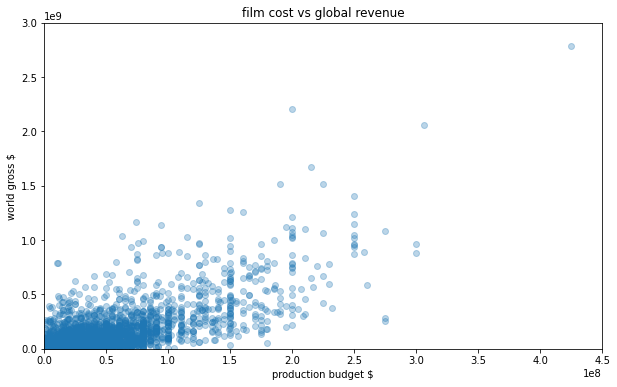

In [53]:
plt.figure(figsize=(10,6))
plt.scatter(X,y,alpha=0.3)
plt.title('film cost vs global revenue')
plt.xlabel('production budget $')
plt.ylabel('world gross $')
plt.ylim(0,3000000000)
plt.xlim(0,450000000)
plt.show()

### Split Data into different Training and Test Dataset  (95% Training Data / 5% Test or validation Data)

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y, test_size=0.05, random_state=6)


## Linear Regression Model (Training and Evaluation)

In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


def linear_regression_model(X_train, y_train, X_test, y_test):
    # Create linear regression object
    regr = LinearRegression(fit_intercept =True)

    # Train the model using the training sets
    reg = regr.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = regr.predict(X_test)

    # The coefficients
    print(f"Coefficients: {regr.coef_}")

    # The intercept
    print(f"Interccept: {regr.intercept_}")

    # The mean squared error
    print(f"Mean squared error: {mean_squared_error(y_test, y_pred):.2f}")

    # The coefficient of determination: 1 is perfect prediction
    print(f"Coefficient of determination: {r2_score(y_test, y_pred):.2f}")

    plt.figure(figsize=(10,6))
    plt.scatter(X_test, y_pred, color = 'red')
    plt.scatter(X_test, y_test, color = 'blue')
    plt.ylabel('worldwide_gross_usd')
    plt.xlabel('production_budget_usd')
    plt.title('Production Budget in $ vs. Wordwide gross earned in $')
    plt.show()


Coefficients: [3.10612327]
Interccept: -7122291.368082479
Mean squared error: 13162644979618130.00
Coefficient of determination: 0.52


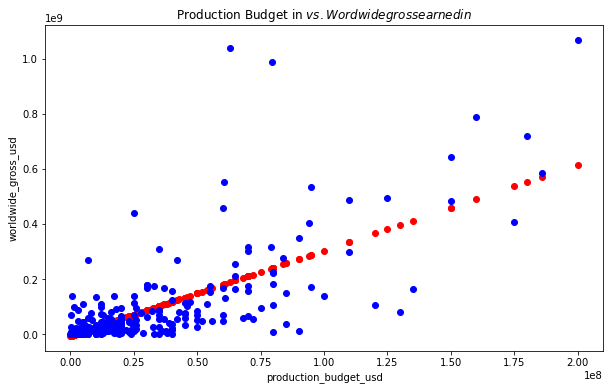

In [79]:
linear_regression_model(X_train, y_train, X_test, y_test)